In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
raw_data_path=os.path.join('data','raw')
df=pd.read_csv(os.path.join(raw_data_path,'fer2013.csv'))

In [2]:
df_train=df[df.Usage=='Training']
df_test=df[df.Usage=='PrivateTest']

In [3]:
X=[]
for i in range(len(df)):
    X.append(df.loc[i,'pixels'].split(' '))

In [4]:
X=np.array(X,np.int32)


In [5]:
# Feature Scaling 
X=(X-X.mean())/X.std()

In [6]:
y=df.emotion.values

In [7]:
def display_data(X,y,labels):
    for i in range(len(labels)):
        x,y_i=X[y==i],y[y==i]
        N=len(x)
        j=np.random.choice(N)
        plt.imshow(x[j].reshape(48,48),cmap='gray')
        plt.title(labels[y_i[j]])
        plt.show()

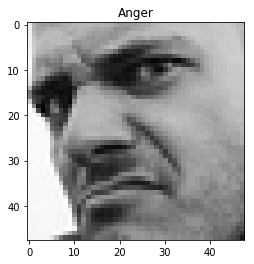

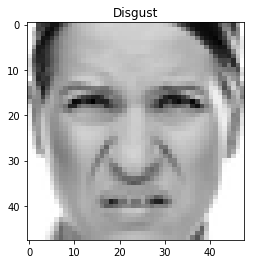

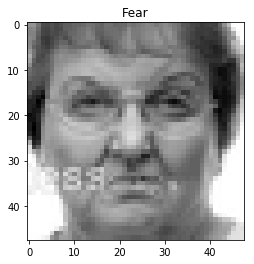

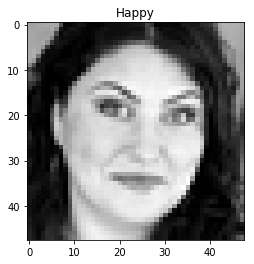

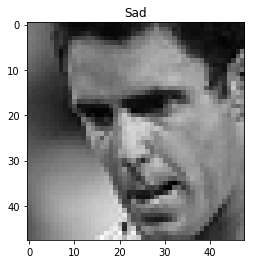

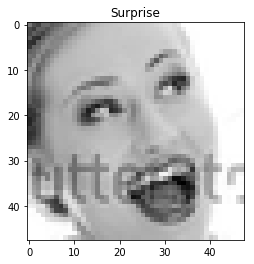

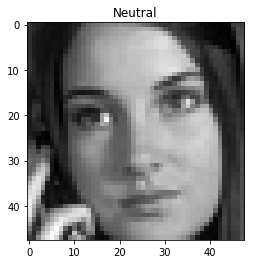

In [8]:
labels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
display_data(X,y,labels)

In [11]:
X_train=X[df.Usage=='Training']
y_train=y[df.Usage=='Training']
X_test=X[df.Usage!='Training']
y_test=y[df.Usage!='Training']

In [114]:
def one_hot_encoder(X):
    N=len(X)
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
def sigmoid(z):
    return 1/(1+np.exp(-z))
def softmax(a):
    return np.exp(a)/(np.exp(a)).sum(axis=1,keepdims=True)
def relu(z):
    return z*(z>0)
def cost_softmax(y,y_p):
    return -(y*np.log(y_p)).sum()
def cost_sigmoid(y,y_p):
    return -(y*np.log(y_p)+(1-y)*np.log(1-y_p)).sum()
def gradientW(y,y_p,X):
    return X.T.dot(y_p-y)
def gradientb(y,y_p):
    return (y_p-y).sum(axis=0)
def train_nn(X,y,W,b,lr,epoch):
    c=[]
    cl=[]
    for i in range(epoch):
        y_p=softmax(X.dot(W)+b)
        W=W-lr*gradientW(y,y_p,X)
        b=b-lr*gradientb(y,y_p)
        c.append(cost_softmax(y,y_p))
        cl.append(np.mean(y==y_p))
#         print(W)
#         print(b)
        if i % 100==0:
            print('C: {0} Cl:{1}'.format(c[i],cl[i]))
    return y_p,W,b,c,cl


In [115]:
N,D=X.shape
Y=one_hot_encoder(y)
K=Y.shape[1]
W=np.random.randn(D,K)
b=np.random.randn(K)
lr=0.0001
y_p,W,b,c,cl=train_nn(X,Y,W,b,0.000001,10000)

C: 2489306.1484854473 Cl:0.005453626263390245
C: 990409.0096132284 Cl:0.00224514249091394
C: 825380.891617151 Cl:0.001711722111867011
C: 740308.0308905707 Cl:0.0014728771660251026
C: 684269.8830196218 Cl:0.0012658782129621152
C: 642349.2662752441 Cl:0.0010986867508727793
C: 608777.1039705732 Cl:0.000923533790588713
C: 580762.1755440048 Cl:0.000784207572180933
C: 556705.7252194906 Cl:0.0006886695938441696
C: 535622.2310048781 Cl:0.0005971123646047713
C: 516849.0953358166 Cl:0.0004936128880732776
C: 499941.61462319747 Cl:0.0004339016516128005
C: 484565.1552698083 Cl:0.0003304021750813068
C: 470471.95284704416 Cl:0.00026671018952346455
C: 457474.20956938126 Cl:0.00025078719313400394
C: 445435.07955610374 Cl:0.0002269026985498131
C: 434245.9404203461 Cl:0.00022292194945244795
C: 423815.2586588204 Cl:0.00017913370938143138
C: 414059.5891659122 Cl:0.00015524921479724053
C: 404903.0782005248 Cl:0.00013534546931041484
C: 396281.8118916239 Cl:0.00011146097472622398
C: 388145.1943302017 Cl:9.155

KeyboardInterrupt: 

In [156]:
y_s=df_train.loc[(df_train.emotion==0) | (df_train.emotion==1),'emotion'].values
X_s=[]
for i in np.where((df_train.emotion==0) | (df_train.emotion==1))[0]:
    X_s.append(df_train.loc[i,'pixels'].split(' '))

In [158]:
X_s=np.array(X_s,dtype=np.float32)/255.0

In [171]:
X0=X_s[y_s!=1]
X1=X_s[y_s==1]
y0=y_s[y_s!=1]
y1=y_s[y_s==1]

In [173]:
X1=np.repeat(X1,9,axis=0)
y1=np.repeat(y1,9,axis=0)

In [174]:
X_b=np.concatenate((X0,X1),axis=0)
y_b=np.concatenate((y0,y1),axis=0)

In [188]:
y_b.shape

(7919,)

In [221]:
N,D=X_b.shape
W=np.random.randn(D)
b=np.random.randn()
# y_p,W,b,c,cl=train_nn(X,Y,W,b,0.01,1000)
lr=0.000001

In [222]:
cl=[]
c=[]
for i in range(100000):
    y_p=sigmoid(X_b.dot(W)+b)
    W=W-lr*(X_b.T.dot(y_p-y_b))
    b=b-lr*((y_p-y_b).sum(axis=0))
    cl.append(np.mean(y_b==np.round(y_p)))
    c.append(cost_softmax(y_b,y_p))
    if i % 1000 == 0:
        print('Sigmoid Cost: {0} Classification: {1}'.format(c[i],cl[i]))

Sigmoid Cost: 53082.43491749106 Classification: 0.46571536810203307
Sigmoid Cost: 7027.980168281158 Classification: 0.5241823462558404
Sigmoid Cost: 5764.448903205971 Classification: 0.560803131708549
Sigmoid Cost: 5084.665865873849 Classification: 0.589468367218083
Sigmoid Cost: 4613.79833513519 Classification: 0.6072736456623311
Sigmoid Cost: 4254.346635496598 Classification: 0.61396640990024
Sigmoid Cost: 3966.109661303948 Classification: 0.6255840383886855
Sigmoid Cost: 3730.243474151894 Classification: 0.6301300669276424
Sigmoid Cost: 3536.201239521341 Classification: 0.6377067811592373
Sigmoid Cost: 3376.169630963377 Classification: 0.6449046596792525
Sigmoid Cost: 3242.403552246968 Classification: 0.6503346382118954
Sigmoid Cost: 3127.712437102766 Classification: 0.6558908953150651
Sigmoid Cost: 3026.9889501787165 Classification: 0.6606894809950752
Sigmoid Cost: 2936.9812648116495 Classification: 0.6666245738098244
Sigmoid Cost: 2855.5246342430573 Classification: 0.6753377951761

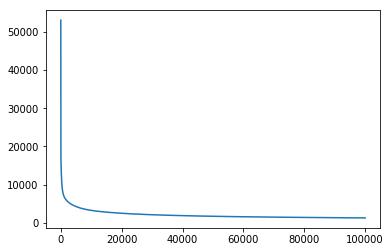

In [223]:
plt.plot(c)
plt.show()

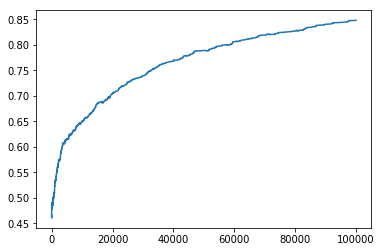

In [224]:
plt.plot(cl)
plt.show()

In [208]:
sigmoid(X_b.dot(W)+b)

array([8.47490966e-01, 3.01082870e-04, 6.30597729e-04, ...,
       7.27741253e-01, 7.27741253e-01, 7.27741253e-01])

In [25]:
softmax(X.dot(W)+b).shape

(35887, 7)

In [104]:
y_p=softmax(X.dot(W)+b)

In [105]:
W=W+lr*gradientW(Y,y_p,X)

In [106]:
b=b+lr*gradientb(Y,y_p)

In [107]:
cost_softmax(Y,y_p)

2052698.6815354815

In [108]:
np.mean(Y==y_p)

0.005704413456524249

In [109]:
np.exp(X.dot(W)+b)

array([[1.20454668e-041, 1.23625480e-065, 2.97938903e-014, ...,
        7.14820933e+180, 8.22198278e+091, 7.02467510e+058],
       [7.56091780e-036, 4.19157334e+019, 1.52470941e-038, ...,
        1.49281695e+047, 2.65006479e-014, 4.41864768e-028],
       [6.40103278e+044, 1.65268143e+124, 1.03717978e-028, ...,
        1.36285699e-079, 1.87534038e+039, 1.54369912e+164],
       ...,
       [7.21459942e+016, 3.11237572e+145, 4.03021205e-016, ...,
        8.25621592e-104, 2.33916796e-074, 1.06168420e+154],
       [1.27266545e-009, 9.65406442e-242, 9.46884608e+010, ...,
        5.19640523e+294, 8.82426132e+185, 1.19138404e-083],
       [4.88356101e-001, 2.77016415e-009, 7.62780595e-034, ...,
        1.14752909e+048, 4.49390538e+019, 3.03841320e+104]])

In [66]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [78]:
547*9

4923

In [317]:
W

array([ 0.08189879, -0.09900622, -0.34243108, ..., -1.12261775,
       -0.09251954, -0.00575431])

In [318]:
np.savez('Weights.npz',W=W,b=b)

In [226]:
b

-2.1138345557348526

In [266]:
df_test.reset_index(drop=True,inplace=True)
y_s_test=df_test.loc[(df_test.emotion==0) | (df_test.emotion==1),'emotion'].values
X_s_test=[]
for i in np.where((df_test.emotion==0) | (df_test.emotion==1))[0]:
    X_s_test.append(df_test.loc[i,'pixels'].split(' '))
X_s_test=np.array(X_s_test,dtype=np.float32)/255.0

In [267]:
X_s_test

array([[0.6666667 , 0.4627451 , 0.39607844, ..., 0.62352943, 0.52156866,
        0.5137255 ],
       [0.5411765 , 0.5568628 , 0.25882354, ..., 0.03921569, 0.03921569,
        0.04313726],
       [0.9607843 , 0.9607843 , 0.9372549 , ..., 0.45882353, 0.4509804 ,
        0.40784314],
       ...,
       [0.54509807, 0.5529412 , 0.5529412 , ..., 0.54901963, 0.49803922,
        0.38039216],
       [0.70980394, 0.69411767, 0.6901961 , ..., 0.23529412, 0.10980392,
        0.21568628],
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.6039216 , 0.52156866,
        0.44313726]], dtype=float32)

In [271]:
y_p_t=np.round(sigmoid(X_s_test.dot(W)+b))

In [272]:
np.mean(y_s_test==y_p_t)

0.7271062271062271

In [274]:
(y_s_test-y_p_t).sum()

-103.0

In [256]:
y_s_test.shape

(546,)

In [254]:
X_s_test.shape

(4431, 2304)

In [255]:
y_s_test=df_test.loc[(df_test.emotion==0) | (df_test.emotion==1),'emotion'].values

In [258]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 3 columns):
emotion    3589 non-null int64
pixels     3589 non-null object
Usage      3589 non-null object
dtypes: int64(1), object(2)
memory usage: 84.2+ KB


In [309]:
class LogisticModel(object):
    def __init__(self,lr,epoch=10000):
        self.lr=lr
        self.epoch=epoch
    def fit(self,X,y,fig=False):
        N,D=X.shape
        tr_i=np.random.choice(N,int(N*0.8),replace=False)
        t_i=[i for i in range(N) if i not in tr_i]
        X_train=X[tr_i]
        y_train=y[tr_i]
        X_test=X[t_i]
        y_test=y[t_i]
        W=np.random.randn(D)/np.sqrt(D)
        b=np.random.randn()
        c_t=[]
        c_v=[]
        cl_t=[]
        cl_v=[]
        for i in range(self.epoch):
            y_p_train=self.sigmoid(X_train.dot(W)+b)
            y_p_test=self.sigmoid(X_test.dot(W)+b)
            W=W-self.lr*(X_train.T.dot(y_p_train-y_train))
            b=b-self.lr*(y_p_train-y_train).sum(axis=0)
            c_t.append(self.cost(y_train,y_p_train))
            cl_t.append(np.mean(y_train==np.round(y_p_train)))
            c_v.append(self.cost(y_test,y_p_test))
            cl_v.append(np.mean(y_test==np.round(y_p_test)))
            if i % 100 == 0:
                print('Train Cost: {0} Classification: {1}'.format(c_t[i],cl_t[i]))
        if fig==True:
            plt.plot(c_t,label='Training Cost')
            plt.plot(c_v,label='Validation Cost')
            plt.legend()
            plt.show()
            plt.plot(cl_t,label='Training Classification Rate')
            plt.plot(cl_v,label='Validation Classification Rate')
            plt.legend()
            plt.show()
        self.W=W
        self.b=b
    def predict(self,X):
        return np.round(self.sigmoid(X.dot(self.W)+self.b))
    def score(self,y,y_p):
        return np.mean(y==y_p)
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def cost(self,y,y_p):
        return -(y*np.log(y_p)+(1-y)*np.log(1-y_p)).sum()
    

        

In [314]:
logit=LogisticModel(0.0000005,200000)

In [315]:
logit.fit(X_b,y_b,fig=True)

Train Cost: 9328.526374386282 Classification: 0.4972375690607735
Train Cost: 4653.18400155326 Classification: 0.5018153117600631
Train Cost: 4551.965667737741 Classification: 0.5267561168113655
Train Cost: 4479.437614753933 Classification: 0.5480662983425414
Train Cost: 4423.692783612675 Classification: 0.555958958168903
Train Cost: 4378.755253680061 Classification: 0.5636937647987372
Train Cost: 4341.178906577012 Classification: 0.570481452249408
Train Cost: 4308.827969097306 Classification: 0.5775848460931334
Train Cost: 4280.31516983962 Classification: 0.582162588792423
Train Cost: 4254.7066520525495 Classification: 0.5894238358326757
Train Cost: 4231.354882013316 Classification: 0.5949486977111287
Train Cost: 4209.799104580223 Classification: 0.6009471191791633
Train Cost: 4189.703741406715 Classification: 0.6074191002367798
Train Cost: 4170.819098486472 Classification: 0.6138910812943962
Train Cost: 4152.9556640057945 Classification: 0.6202052091554854
Train Cost: 4135.96692489991

Train Cost: 3369.722217728961 Classification: 0.7444356748224151
Train Cost: 3366.1293360999125 Classification: 0.7444356748224151
Train Cost: 3362.5624894169714 Classification: 0.7445935280189424
Train Cost: 3359.02133427648 Classification: 0.7453827940015786
Train Cost: 3355.505533695229 Classification: 0.7447513812154696
Train Cost: 3352.0147569530664 Classification: 0.7439621152328335
Train Cost: 3348.548679440394 Classification: 0.7436464088397791
Train Cost: 3345.106982510384 Classification: 0.7441199684293607
Train Cost: 3341.6893533357174 Classification: 0.7444356748224151
Train Cost: 3338.2954847696783 Classification: 0.745698500394633
Train Cost: 3334.9250752114476 Classification: 0.7458563535911602
Train Cost: 3331.5778284754233 Classification: 0.7461720599842147
Train Cost: 3328.2534536644284 Classification: 0.7464877663772691
Train Cost: 3324.951665046667 Classification: 0.7469613259668508
Train Cost: 3321.672181936272 Classification: 0.7461720599842147
Train Cost: 3318.41

Train Cost: 3050.720717587761 Classification: 0.7764798737174428
Train Cost: 3048.8945525222653 Classification: 0.77663772691397
Train Cost: 3047.0757029049437 Classification: 0.7767955801104972
Train Cost: 3045.264112043005 Classification: 0.7771112865035517
Train Cost: 3043.459723869792 Classification: 0.7772691397000789
Train Cost: 3041.662482935871 Classification: 0.7772691397000789
Train Cost: 3039.8723344002797 Classification: 0.7772691397000789
Train Cost: 3038.089224021918 Classification: 0.7774269928966061
Train Cost: 3036.313098151101 Classification: 0.7777426992896607
Train Cost: 3034.5439037212373 Classification: 0.7777426992896607
Train Cost: 3032.7815882406735 Classification: 0.7777426992896607
Train Cost: 3031.0260997846526 Classification: 0.7780584056827151
Train Cost: 3029.277386987432 Classification: 0.7780584056827151
Train Cost: 3027.53539903452 Classification: 0.7782162588792423
Train Cost: 3025.8000856550507 Classification: 0.7771112865035517
Train Cost: 3024.0713

Train Cost: 2864.4342846136524 Classification: 0.8034727703235991
Train Cost: 2863.2247146046284 Classification: 0.8034727703235991
Train Cost: 2862.018373515215 Classification: 0.8036306235201263
Train Cost: 2860.815243805735 Classification: 0.8036306235201263
Train Cost: 2859.6153080738077 Classification: 0.8037884767166535
Train Cost: 2858.4185490529553 Classification: 0.8039463299131807
Train Cost: 2857.224949611236 Classification: 0.8050513022888713
Train Cost: 2856.034492749886 Classification: 0.8042620363062352
Train Cost: 2854.8471616019833 Classification: 0.804104183109708
Train Cost: 2853.6629394311276 Classification: 0.804104183109708
Train Cost: 2852.4818096301337 Classification: 0.804104183109708
Train Cost: 2851.303755719743 Classification: 0.8042620363062352
Train Cost: 2850.1287613473514 Classification: 0.8044198895027624
Train Cost: 2848.956810285752 Classification: 0.8047355958958169
Train Cost: 2847.787886431889 Classification: 0.8048934490923442
Train Cost: 2846.621

Train Cost: 2732.8499355488575 Classification: 0.8138910812943962
Train Cost: 2731.943119425766 Classification: 0.8138910812943962
Train Cost: 2731.0380779839134 Classification: 0.8140489344909234
Train Cost: 2730.1348038756587 Classification: 0.8140489344909234
Train Cost: 2729.2332897979886 Classification: 0.8138910812943962
Train Cost: 2728.3335284921613 Classification: 0.8142067876874507
Train Cost: 2727.435512743368 Classification: 0.8142067876874507
Train Cost: 2726.5392353803827 Classification: 0.8143646408839779
Train Cost: 2725.6446892752283 Classification: 0.8146803472770323
Train Cost: 2724.7518673428376 Classification: 0.8148382004735596
Train Cost: 2723.8607625407194 Classification: 0.8149960536700869
Train Cost: 2722.9713678686317 Classification: 0.8148382004735596
Train Cost: 2722.083676368253 Classification: 0.8149960536700869
Train Cost: 2721.197681122857 Classification: 0.8149960536700869
Train Cost: 2720.3133752569947 Classification: 0.8149960536700869
Train Cost: 27

Train Cost: 2630.550165372671 Classification: 0.8265193370165745
Train Cost: 2629.8207884524045 Classification: 0.8268350434096291
Train Cost: 2629.0925242464687 Classification: 0.8269928966061563
Train Cost: 2628.3653690801916 Classification: 0.8269928966061563
Train Cost: 2627.6393192971173 Classification: 0.8269928966061563
Train Cost: 2626.9143712588884 Classification: 0.8269928966061563
Train Cost: 2626.1905213451337 Classification: 0.8269928966061563
Train Cost: 2625.467765953347 Classification: 0.8271507498026835
Train Cost: 2624.7461014987775 Classification: 0.8273086029992107
Train Cost: 2624.0255244143127 Classification: 0.8276243093922652
Train Cost: 2623.3060311503696 Classification: 0.8276243093922652
Train Cost: 2622.58761817478 Classification: 0.8276243093922652
Train Cost: 2621.8702819726814 Classification: 0.8276243093922652
Train Cost: 2621.1540190464048 Classification: 0.8287292817679558
Train Cost: 2620.4388259153684 Classification: 0.8296764009471191
Train Cost: 26

Train Cost: 2546.3728233600173 Classification: 0.832991318074191
Train Cost: 2545.7596564166615 Classification: 0.832991318074191
Train Cost: 2545.14725199206 Classification: 0.832991318074191
Train Cost: 2544.535608015939 Classification: 0.832991318074191
Train Cost: 2543.924722426649 Classification: 0.8333070244672455
Train Cost: 2543.3145931711088 Classification: 0.8333070244672455
Train Cost: 2542.7052182047632 Classification: 0.8334648776637726
Train Cost: 2542.096595491535 Classification: 0.8334648776637726
Train Cost: 2541.48872300378 Classification: 0.8334648776637726
Train Cost: 2540.8815987222406 Classification: 0.8336227308602999
Train Cost: 2540.275220636001 Classification: 0.8339384372533544
Train Cost: 2539.66958674244 Classification: 0.8339384372533544
Train Cost: 2539.0646950471873 Classification: 0.8339384372533544
Train Cost: 2538.4605435640806 Classification: 0.8339384372533544
Train Cost: 2537.8571303151184 Classification: 0.8339384372533544
Train Cost: 2537.2544533

Train Cost: 2474.5208850107647 Classification: 0.8380426203630623
Train Cost: 2473.9898925111765 Classification: 0.8380426203630623
Train Cost: 2473.4594568612256 Classification: 0.8380426203630623
Train Cost: 2472.929576787923 Classification: 0.8380426203630623
Train Cost: 2472.400251022816 Classification: 0.8394632991318074
Train Cost: 2471.8714783019655 Classification: 0.8394632991318074
Train Cost: 2471.343257365924 Classification: 0.8394632991318074
Train Cost: 2470.815586959714 Classification: 0.8394632991318074
Train Cost: 2470.2884658328094 Classification: 0.8396211523283347
Train Cost: 2469.761892739111 Classification: 0.8396211523283347
Train Cost: 2469.23586643693 Classification: 0.8397790055248618
Train Cost: 2468.7103856889626 Classification: 0.8399368587213891
Train Cost: 2468.1854492622724 Classification: 0.8399368587213891
Train Cost: 2467.661055928271 Classification: 0.8399368587213891
Train Cost: 2467.1372044626914 Classification: 0.8399368587213891
Train Cost: 2466.6

Train Cost: 2411.6273614248585 Classification: 0.8464088397790055
Train Cost: 2411.157795224185 Classification: 0.8464088397790055
Train Cost: 2410.688655270758 Classification: 0.8465666929755328
Train Cost: 2410.219940727388 Classification: 0.8465666929755328
Train Cost: 2409.7516507594764 Classification: 0.8465666929755328
Train Cost: 2409.2837845350055 Classification: 0.8465666929755328
Train Cost: 2408.816341224522 Classification: 0.8465666929755328
Train Cost: 2408.3493200011326 Classification: 0.8465666929755328
Train Cost: 2407.8827200404903 Classification: 0.8465666929755328
Train Cost: 2407.4165405207837 Classification: 0.8465666929755328
Train Cost: 2406.950780622728 Classification: 0.8465666929755328
Train Cost: 2406.4854395295533 Classification: 0.8465666929755328
Train Cost: 2406.0205164269955 Classification: 0.8465666929755328
Train Cost: 2405.5560105032837 Classification: 0.8465666929755328
Train Cost: 2405.091920949133 Classification: 0.8465666929755328
Train Cost: 2404

Train Cost: 2355.569749192443 Classification: 0.8509865824782952
Train Cost: 2355.148044462562 Classification: 0.8509865824782952
Train Cost: 2354.7266778643307 Classification: 0.8509865824782952
Train Cost: 2354.305648817196 Classification: 0.8509865824782952
Train Cost: 2353.884956742182 Classification: 0.8509865824782952
Train Cost: 2353.4646010618862 Classification: 0.8509865824782952
Train Cost: 2353.0445812004755 Classification: 0.8509865824782952
Train Cost: 2352.6248965836758 Classification: 0.8509865824782952
Train Cost: 2352.20554663877 Classification: 0.8509865824782952
Train Cost: 2351.7865307945904 Classification: 0.8509865824782952
Train Cost: 2351.3678484815136 Classification: 0.8509865824782952
Train Cost: 2350.9494991314564 Classification: 0.8509865824782952
Train Cost: 2350.5314821778666 Classification: 0.8509865824782952
Train Cost: 2350.1137970557193 Classification: 0.8509865824782952
Train Cost: 2349.696443201513 Classification: 0.8509865824782952
Train Cost: 2349.

Train Cost: 2304.9232700625407 Classification: 0.856353591160221
Train Cost: 2304.5400595365873 Classification: 0.8557221783741121
Train Cost: 2304.1571247653765 Classification: 0.8557221783741121
Train Cost: 2303.774465328843 Classification: 0.8557221783741121
Train Cost: 2303.392080807939 Classification: 0.8560378847671666
Train Cost: 2303.0099707846284 Classification: 0.8560378847671666
Train Cost: 2302.628134841886 Classification: 0.8560378847671666
Train Cost: 2302.2465725636885 Classification: 0.8560378847671666
Train Cost: 2301.8652835350185 Classification: 0.8560378847671666
Train Cost: 2301.4842673418543 Classification: 0.8560378847671666
Train Cost: 2301.1035235711743 Classification: 0.8560378847671666
Train Cost: 2300.7230518109436 Classification: 0.8560378847671666
Train Cost: 2300.3428516501226 Classification: 0.8560378847671666
Train Cost: 2299.962922678653 Classification: 0.8560378847671666
Train Cost: 2299.583264487461 Classification: 0.8561957379636937
Train Cost: 2299

Train Cost: 2258.6829905102545 Classification: 0.8601420678768745
Train Cost: 2258.33151715301 Classification: 0.8601420678768745
Train Cost: 2257.980273651877 Classification: 0.8601420678768745
Train Cost: 2257.6292596922435 Classification: 0.8601420678768745
Train Cost: 2257.2784749601806 Classification: 0.8601420678768745
Train Cost: 2256.927919142443 Classification: 0.8601420678768745
Train Cost: 2256.5775919264593 Classification: 0.8601420678768745
Train Cost: 2256.22749300034 Classification: 0.8601420678768745
Train Cost: 2255.877622052869 Classification: 0.8602999210734017
Train Cost: 2255.5279787735017 Classification: 0.861878453038674
Train Cost: 2255.1785628523658 Classification: 0.861878453038674
Train Cost: 2254.8293739802593 Classification: 0.861878453038674
Train Cost: 2254.4804118486436 Classification: 0.861878453038674
Train Cost: 2254.1316761496496 Classification: 0.861878453038674
Train Cost: 2253.7831665760677 Classification: 0.861878453038674
Train Cost: 2253.434882

Train Cost: 2216.1114326911206 Classification: 0.8621941594317285
Train Cost: 2215.7866472968362 Classification: 0.8621941594317285
Train Cost: 2215.462056902502 Classification: 0.8621941594317285
Train Cost: 2215.1376612657095 Classification: 0.8621941594317285
Train Cost: 2214.8134601445304 Classification: 0.8621941594317285
Train Cost: 2214.4894532975086 Classification: 0.8621941594317285
Train Cost: 2214.165640483665 Classification: 0.8623520126282557
Train Cost: 2213.842021462493 Classification: 0.8623520126282557
Train Cost: 2213.518595993956 Classification: 0.8623520126282557
Train Cost: 2213.1953638384894 Classification: 0.8623520126282557
Train Cost: 2212.872324756999 Classification: 0.8623520126282557
Train Cost: 2212.5494785108567 Classification: 0.8623520126282557
Train Cost: 2212.226824861901 Classification: 0.8623520126282557
Train Cost: 2211.904363572437 Classification: 0.8623520126282557
Train Cost: 2211.582094405234 Classification: 0.8623520126282557
Train Cost: 2211.2

Train Cost: 2176.649672224602 Classification: 0.8655090765588003
Train Cost: 2176.3476911601174 Classification: 0.8655090765588003
Train Cost: 2176.045877927336 Classification: 0.8656669297553276
Train Cost: 2175.744232335037 Classification: 0.8656669297553276
Train Cost: 2175.442754192341 Classification: 0.8656669297553276
Train Cost: 2175.1414433087148 Classification: 0.8656669297553276
Train Cost: 2174.8402994939647 Classification: 0.8656669297553276
Train Cost: 2174.539322558239 Classification: 0.8658247829518547
Train Cost: 2174.238512312027 Classification: 0.8658247829518547
Train Cost: 2173.937868566156 Classification: 0.865982636148382
Train Cost: 2173.6373911317924 Classification: 0.865982636148382
Train Cost: 2173.3370798204423 Classification: 0.8661404893449093
Train Cost: 2173.036934443945 Classification: 0.8661404893449093
Train Cost: 2172.73695481448 Classification: 0.8661404893449093
Train Cost: 2172.437140744559 Classification: 0.8661404893449093
Train Cost: 2172.137492

KeyboardInterrupt: 

In [293]:
logit.W

array([-1.38051585, -1.43102103, -1.31109533, ...,  1.59125638,
        0.07248365, -1.76952648])

In [294]:
logit.b

-0.02165094966966811

In [301]:
logit.cost(y_b,logit.sigmoid(X_b.dot(logit.W)+logit.b))

C:\Users\ytnvj\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


inf

In [304]:
np.sqrt(2)

1.4142135623730951